In [2]:
import glob
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.ticker as mtick
from matplotlib.ticker import MultipleLocator
from tabulate import tabulate
import re
group_name = {"virt_sym":"Chronokernel", "virt_ksys": "ksys_write"}

In [3]:
def clean_data(file_name):
    fin = open(file_name, "rt")
    fout = open("out.txt", "wt")

    for line in fin:
        if line[0] != '#':
            fout.write(' '.join(line.split()) + '\n')
    fin.close()
    fout.close()
    
    os.remove(file_name)
    os.rename("out.txt", file_name)

In [4]:
def load_data(test_name, run_number=-1,discard_outliers=True):
    if run_number >= 0:
        file_name = 'latency_data/{}/baseline_FULL_RUN_{}.txt'.format(test_name, run_number)
    else:
        file_name = 'latency_data/{}/baseline_FULL_RUN_*.txt'.format(test_name)
    files = glob.glob(file_name)
    data = []
    for file in files:
        clean_data(file)
        graph = pd.read_csv(file, sep=' ')
        if run_number >= 0:
            graph['System'] = 'run{}'.format(run_number)
        else:
            graph['System'] = group_name[test_name]
        data.append(graph)
    if(run_number < 0):
        return data
    else:
        return graph

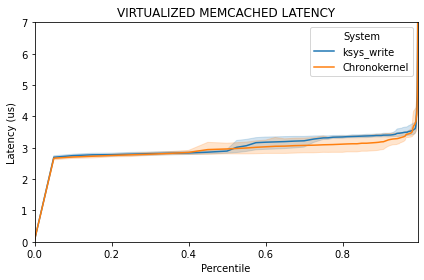

In [5]:
virt_sym = {}
virt_ksys = {}
for i in range(0,4):
    virt_sym[i] = load_data("virt_sym", run_number=i)
    virt_ksys[i] = load_data("virt_ksys", run_number=i)

virt_sym_all = load_data("virt_sym")
virt_memcached_all = load_data("virt_ksys")

virt_memcached_all = virt_memcached_all + virt_sym_all

virt_memcached_data = pd.concat(virt_memcached_all, ignore_index=True)

fig = sns.lineplot(y="Value", x="Percentile", data=virt_memcached_data, hue="System")

fig.set(title="VIRTUALIZED MEMCACHED LATENCY")

plt.xlabel('Percentile')
plt.ylabel('Latency (us)')
plt.ylim(0,7)
plt.xlim(0,0.995)
plt.tight_layout()
plt.savefig('avg_plt.png')


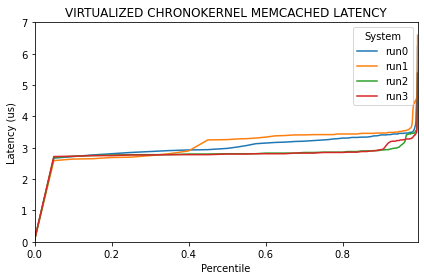

In [6]:
graph_data ={}
for i in range(0,4):
    graph_data[i] = pd.DataFrame(virt_sym[i],columns=['Percentile', 'Value', 'System'])
    graph_data[i] = graph_data[i][graph_data[i]["Percentile"] < 0.995].copy()

graph = pd.concat(graph_data, ignore_index=True)

fig = sns.lineplot(y="Value", x="Percentile", data=graph, hue="System")

fig.set(title="VIRTUALIZED CHRONOKERNEL MEMCACHED LATENCY")

plt.xlabel('Percentile')
plt.ylabel('Latency (us)')
plt.ylim(0,7)
plt.xlim(0,0.995)
plt.tight_layout()
plt.savefig("chronokernel_run_plt.png")

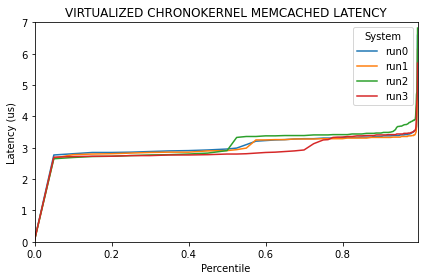

In [7]:
graph_data ={}
for i in range(0,4):
    graph_data[i] = pd.DataFrame(virt_ksys[i],columns=['Percentile', 'Value', 'System'])
    graph_data[i] = graph_data[i][graph_data[i]["Percentile"] < 0.995].copy()

graph = pd.concat(graph_data, ignore_index=True)

fig = sns.lineplot(y="Value", x="Percentile", data=graph, hue="System")

fig.set(title="VIRTUALIZED CHRONOKERNEL MEMCACHED LATENCY")

plt.xlabel('Percentile')
plt.ylabel('Latency (us)')
plt.ylim(0,7)
plt.xlim(0,0.995)
plt.tight_layout()
plt.savefig("ksys_run_plt.png")

In [29]:
file_name = 'throughput_data/{}/throughput_*.info'.format("virt_sym")
files = glob.glob(file_name)
throughput = []
for file in files:
    graph = ["",""]
    f = open(file)
    graph[0] = "run" + str(re.findall(r'\d+',file)[0])
    graph[1] = (f.readline().split())[0]
    throughput.append(graph)

table = tabulate(throughput, headers=['Run #', 'Throughput (KB/s)'])
print("VIRTUALIZED MEMCACHED THROUGHPUT\n")
print(table)

tb_file = open("throughput.txt", "w")
tb_file.write("VIRTUALIZED MEMCACHED THROUGHPUT\n\n")
tb_file.write(table)
tb_file.close()


VIRTUALIZED MEMCACHED THROUGHPUT

Run #      Throughput (KB/s)
-------  -------------------
run3                 5100.86
run2                 5080.63
run1                 4639.79
run0                 4727.86


In [8]:
file_name = 'throughput_data/{}/throughput_*.info'.format("virt_ksys")
files = glob.glob(file_name)
throughput = []
for file in files:
    graph = ["",""]
    f = open(file)
    graph[0] = "run" + str(re.findall(r'\d+',file)[0])
    graph[1] = (f.readline().split())[0]
    throughput.append(graph)

table = tabulate(throughput, headers=['Run #', 'Throughput (KB/s)'])
print("VIRTUALIZED MEMCACHED THROUGHPUT\n")
print(table)

tb_file = open("throughput.txt", "w")
tb_file.write("VIRTUALIZED MEMCACHED THROUGHPUT\n\n")
tb_file.write(table)
tb_file.close()

VIRTUALIZED MEMCACHED THROUGHPUT

Run #      Throughput (KB/s)
-------  -------------------
run3                 4896.9
run2                 4665.8
run1                 4748.41
run0                 4684.35
